# Fake News Detection

In [1]:
!pip install -q seaborn

In [2]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import tempfile
import os

matplotlib.rcParams['figure.figsize'] = [9, 6]

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [4]:
#Download dataset
!wget "https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv" -O fake_news.csv

--2025-12-24 16:30:38--  https://storage.yandexcloud.net/academy.ai/practica/fake_news.csv
Resolving storage.yandexcloud.net (storage.yandexcloud.net)... 213.180.193.243, 2a02:6b8::1d9
Connecting to storage.yandexcloud.net (storage.yandexcloud.net)|213.180.193.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30696129 (29M) [text/csv]
Saving to: ‘fake_news.csv’

fake_news.csv       100%[===================>]  29.27M  8.71MB/s    in 3.9s    

2025-12-24 16:30:44 (7.53 MB/s) - ‘fake_news.csv’ saved [30696129/30696129]



In [5]:
df = pd.read_csv('fake_news.csv')

In [7]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [9]:
#Get labels
labels = df.label

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [14]:
#Инициализация TfidfVectorizer
# stop_words='english' убирает самые частые слова (the, a, is), которые не несут смысла
# max_df=0.7 игнорирует слова, которые встречаются более чем в 70% документов
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [15]:
#Обучаем и трансформируем данные
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

In [16]:
#Инициализация и обучение PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [17]:
#Предсказание и оценка точности
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Точность модели (Accuracy): {round(score*100, 2)}%')

Точность модели (Accuracy): 93.05%


Визуализация результатов

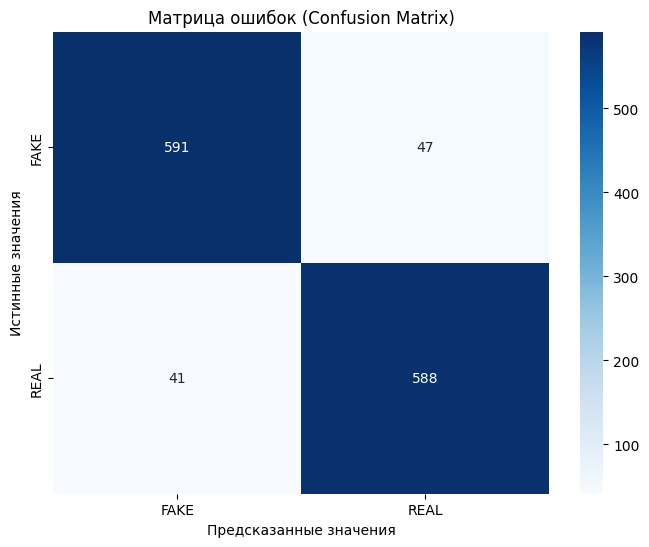

In [18]:
#Матрица ошибок (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['FAKE', 'REAL'],
            yticklabels=['FAKE', 'REAL'])
plt.title('Матрица ошибок (Confusion Matrix)')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.show()

/tmp/ipython-input-1221899425.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=labels, palette='viridis')


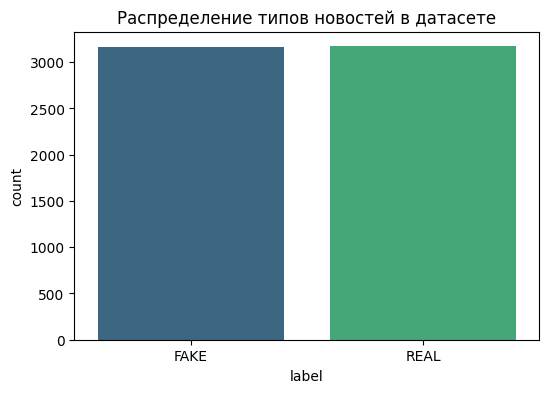

In [19]:
#Дополнительный график: распределение классов в данных
plt.figure(figsize=(6, 4))
sns.countplot(x=labels, palette='viridis')
plt.title('Распределение типов новостей в датасете')
plt.show()

In [20]:
#Отчет классификации
print("\nПодробный отчет:")
print(classification_report(y_test, y_pred))


Подробный отчет:
              precision    recall  f1-score   support

        FAKE       0.94      0.93      0.93       638
        REAL       0.93      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

